In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "trentino-alto adige"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,30.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,4,Trentino-Alto Adige,1,0,1,0,1,0,0,...,0.0,25.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-11-20T17:00:00,4,Trentino-Alto Adige,885,76,961,13554,14515,325,970,...,15.0,6330.0,1663.0,318.0,7.91,6.62,15.32,58.33,-2.56,6.836
270,2020-11-21T17:00:00,4,Trentino-Alto Adige,863,79,942,13435,14377,-138,760,...,30.0,7784.0,2663.0,-119.0,8.39,6.55,9.76,28.54,3.95,5.236
271,2020-11-22T17:00:00,4,Trentino-Alto Adige,873,79,952,13214,14166,-211,694,...,8.0,6424.0,1844.0,-221.0,8.30,6.72,10.80,37.64,0.00,4.827
272,2020-11-23T17:00:00,4,Trentino-Alto Adige,906,81,987,13146,14133,-33,353,...,12.0,2947.0,960.0,-68.0,8.21,6.98,11.98,36.77,2.53,2.492


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 24, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 303
Nuovi tamponi: 3649.0
Percentuale nuovi positivi/nuovi tamponi: 8.3 %
Nuovi guariti: 278.0
Nuovi deceduti: 30.0
Variazione positivi ricoverati con sintomi: -11.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: 5.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 24, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-25T17:00:00,4,Trentino-Alto Adige,33,1,34,1028,1062,28,75,...,0.0,4853.0,1957.0,29.0,2.94,3.20,1.55,3.83,0.00,7.253
1,2020-09-26T17:00:00,4,Trentino-Alto Adige,40,0,40,1063,1103,41,80,...,0.0,3595.0,1685.0,35.0,0.00,3.63,2.23,4.75,-100.00,7.533
2,2020-09-27T17:00:00,4,Trentino-Alto Adige,38,0,38,1107,1145,42,64,...,0.0,3784.0,1375.0,44.0,0.00,3.32,1.69,4.65,0.00,5.802
3,2020-09-28T17:00:00,4,Trentino-Alto Adige,37,0,37,1138,1175,30,45,...,1.0,1208.0,517.0,31.0,0.00,3.15,3.73,8.70,0.00,3.930
4,2020-09-29T17:00:00,4,Trentino-Alto Adige,39,0,39,1114,1153,-22,21,...,0.0,2094.0,941.0,-24.0,0.00,3.38,1.00,2.23,0.00,1.787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-20T17:00:00,4,Trentino-Alto Adige,885,76,961,13554,14515,325,970,...,15.0,6330.0,1663.0,318.0,7.91,6.62,15.32,58.33,-2.56,6.836
57,2020-11-21T17:00:00,4,Trentino-Alto Adige,863,79,942,13435,14377,-138,760,...,30.0,7784.0,2663.0,-119.0,8.39,6.55,9.76,28.54,3.95,5.236
58,2020-11-22T17:00:00,4,Trentino-Alto Adige,873,79,952,13214,14166,-211,694,...,8.0,6424.0,1844.0,-221.0,8.30,6.72,10.80,37.64,0.00,4.827
59,2020-11-23T17:00:00,4,Trentino-Alto Adige,906,81,987,13146,14133,-33,353,...,12.0,2947.0,960.0,-68.0,8.21,6.98,11.98,36.77,2.53,2.492


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

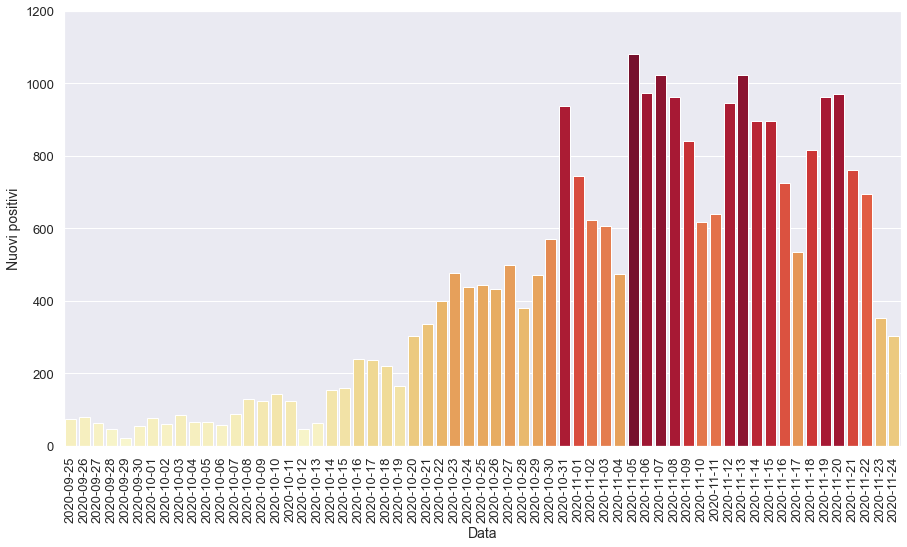

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

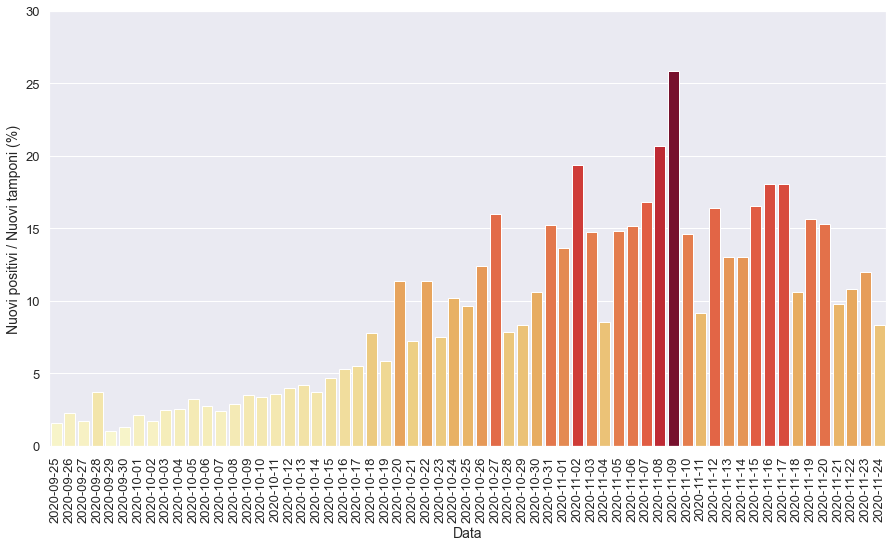

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

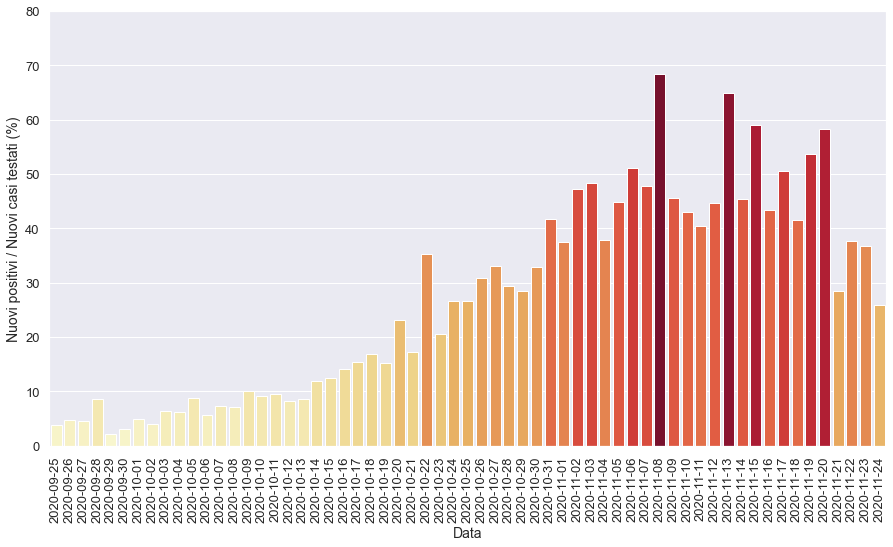

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

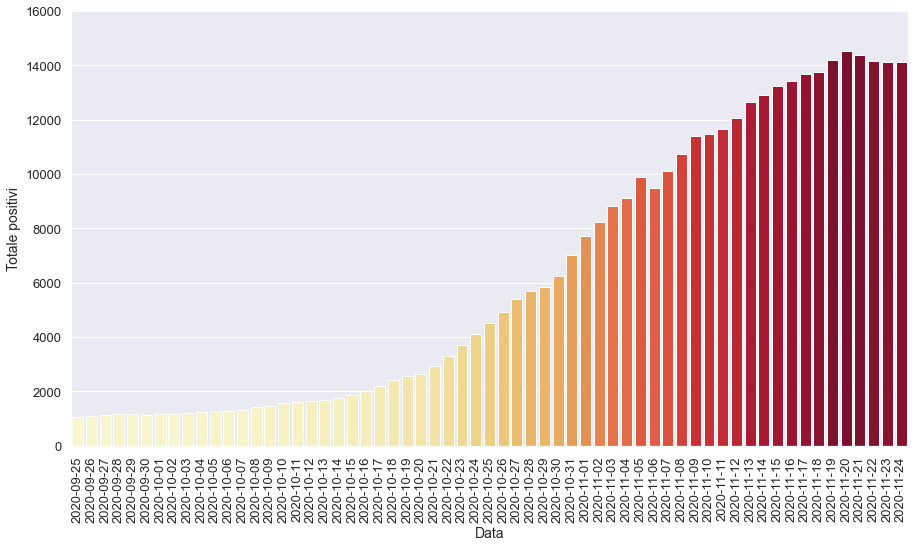

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

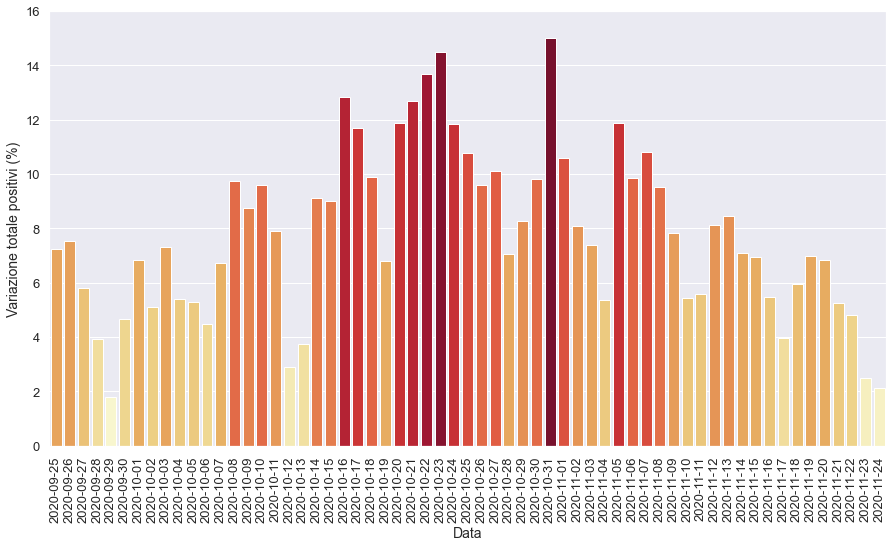

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

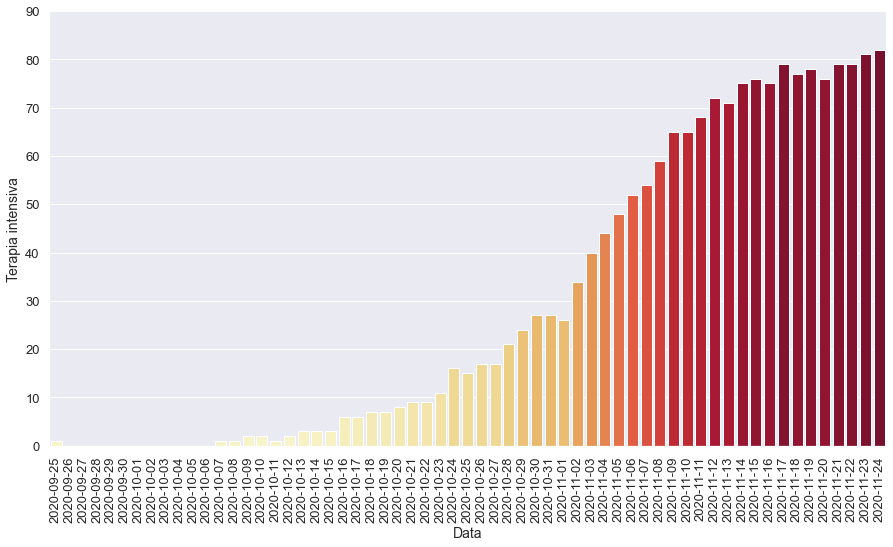

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

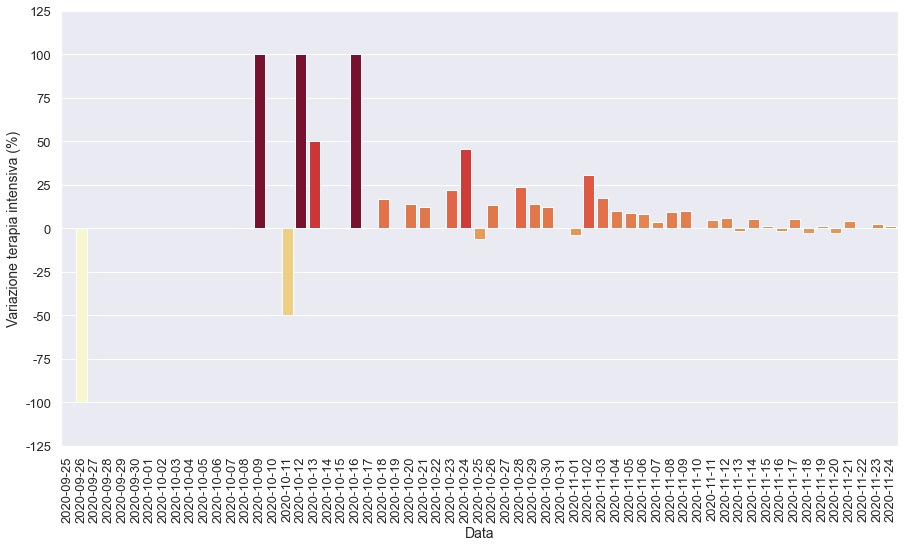

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

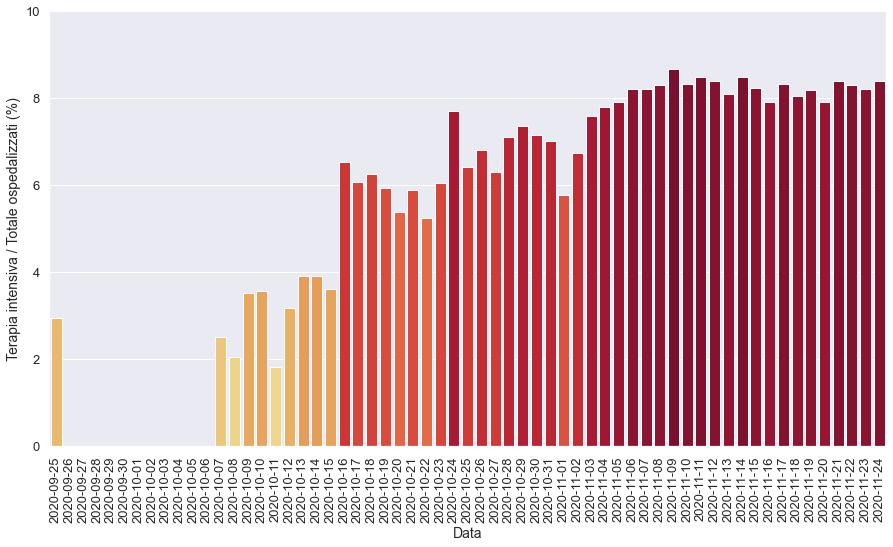

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

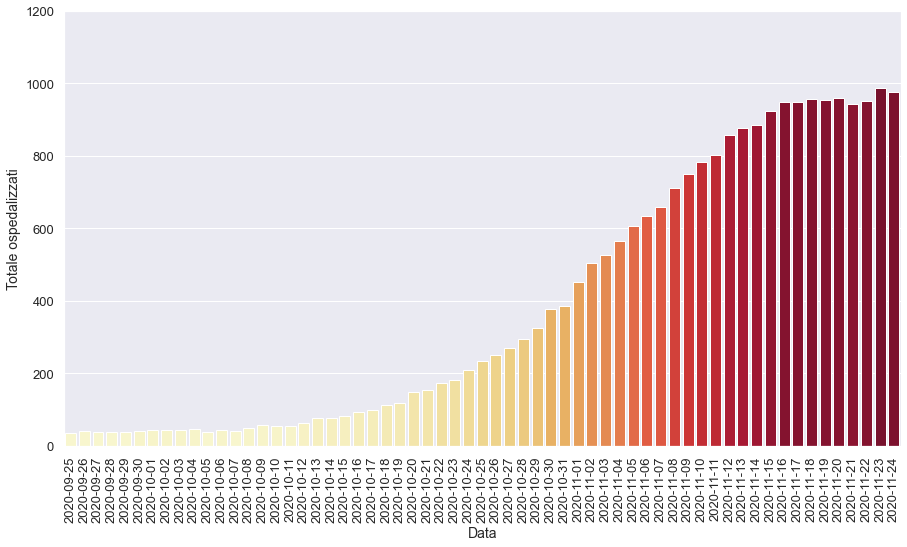

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

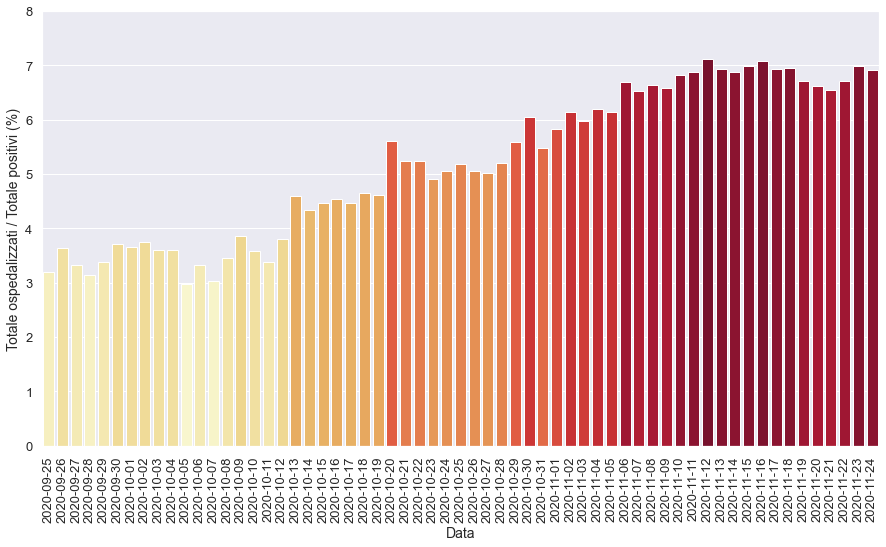

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

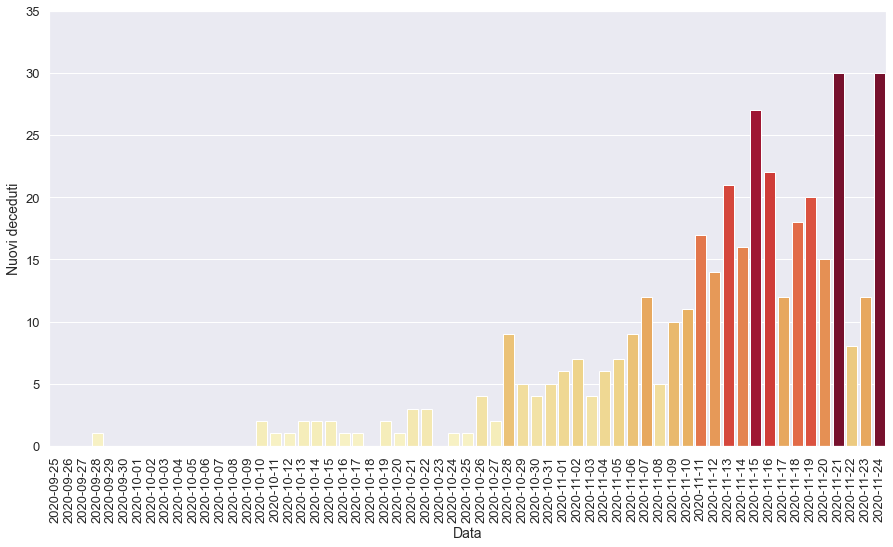

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

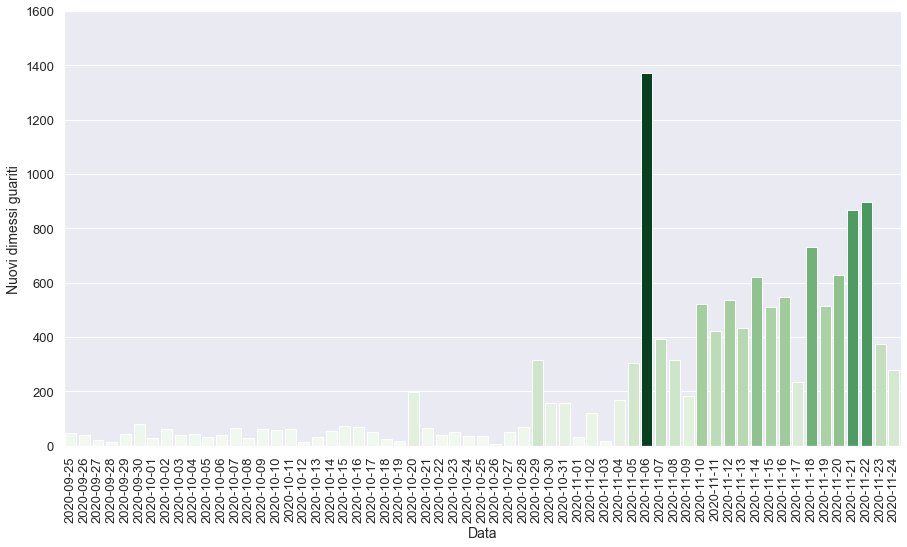

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-25T17:00:00,4,Trentino-Alto Adige,219,15,234,4285,4519,407,443,...,1.0,4580.0,1663.0,381.0,6.41,5.18,9.67,26.64,-6.25,10.773
1,2020-10-26T17:00:00,4,Trentino-Alto Adige,233,17,250,4691,4941,422,434,...,4.0,3497.0,1410.0,406.0,6.80,5.06,12.41,30.78,13.33,9.604
2,2020-10-27T17:00:00,4,Trentino-Alto Adige,253,17,270,5116,5386,445,499,...,2.0,3117.0,1506.0,425.0,6.30,5.01,16.01,33.13,0.00,10.099
3,2020-10-28T17:00:00,4,Trentino-Alto Adige,275,21,296,5392,5688,302,381,...,9.0,4850.0,1294.0,276.0,7.09,5.20,7.86,29.44,23.53,7.074
4,2020-10-29T17:00:00,4,Trentino-Alto Adige,302,24,326,5512,5838,150,471,...,5.0,5669.0,1652.0,120.0,7.36,5.58,8.31,28.51,14.29,8.281
5,2020-10-30T17:00:00,4,Trentino-Alto Adige,351,27,378,5872,6250,412,572,...,4.0,5384.0,1744.0,360.0,7.14,6.05,10.62,32.80,12.50,9.798
6,2020-10-31T17:00:00,4,Trentino-Alto Adige,358,27,385,6640,7025,775,937,...,5.0,6155.0,2245.0,768.0,7.01,5.48,15.22,41.74,0.00,14.992
7,2020-11-01T17:00:00,4,Trentino-Alto Adige,425,26,451,7280,7731,706,744,...,6.0,5441.0,1989.0,640.0,5.76,5.83,13.67,37.41,-3.70,10.591
8,2020-11-02T17:00:00,4,Trentino-Alto Adige,471,34,505,7724,8229,498,624,...,7.0,3216.0,1323.0,444.0,6.73,6.14,19.40,47.17,30.77,8.071
9,2020-11-03T17:00:00,4,Trentino-Alto Adige,487,40,527,8287,8814,585,607,...,4.0,4113.0,1254.0,563.0,7.59,5.98,14.76,48.41,17.65,7.376


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

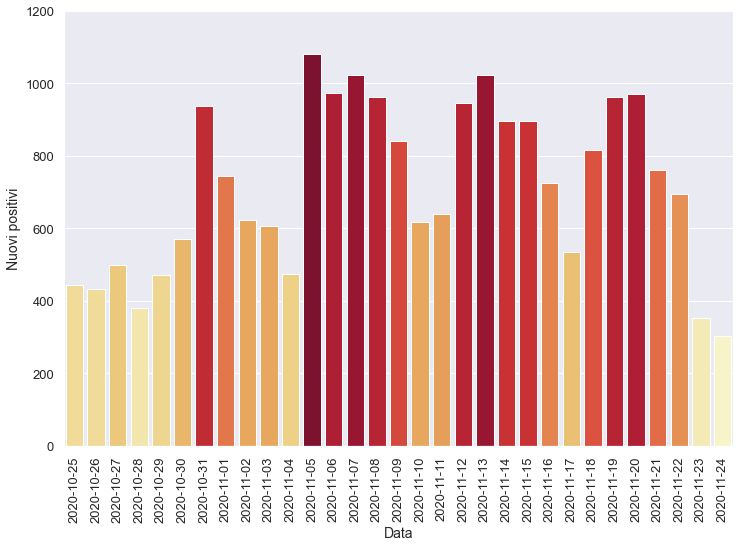

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

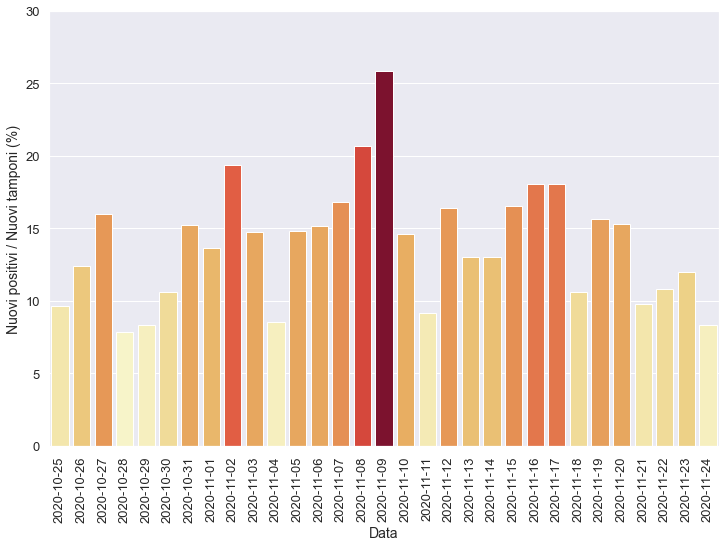

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

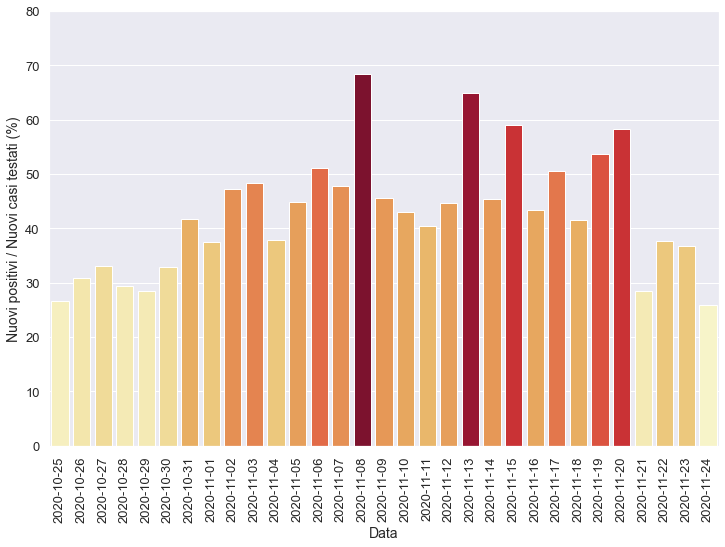

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

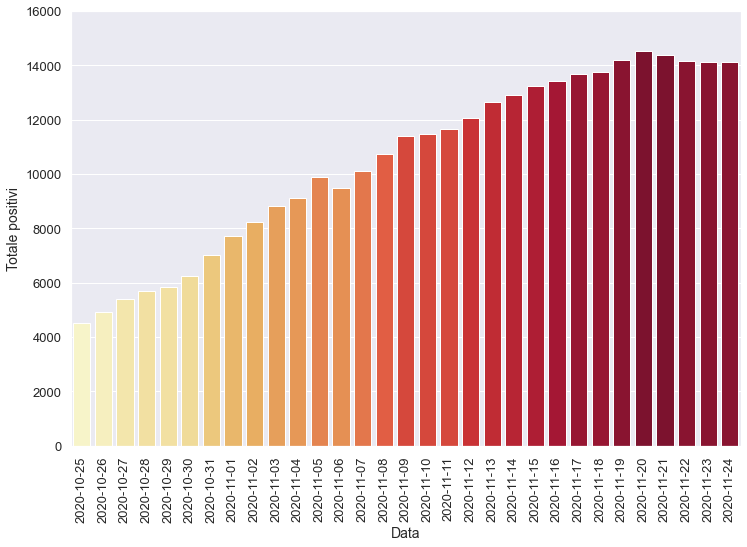

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

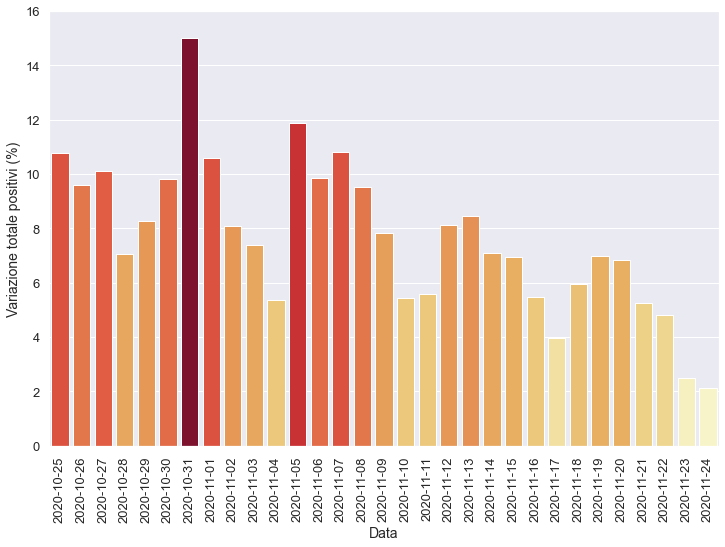

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

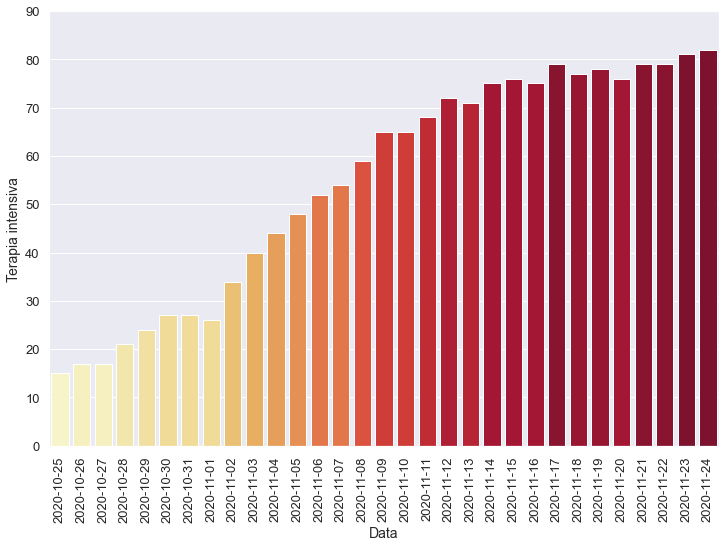

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

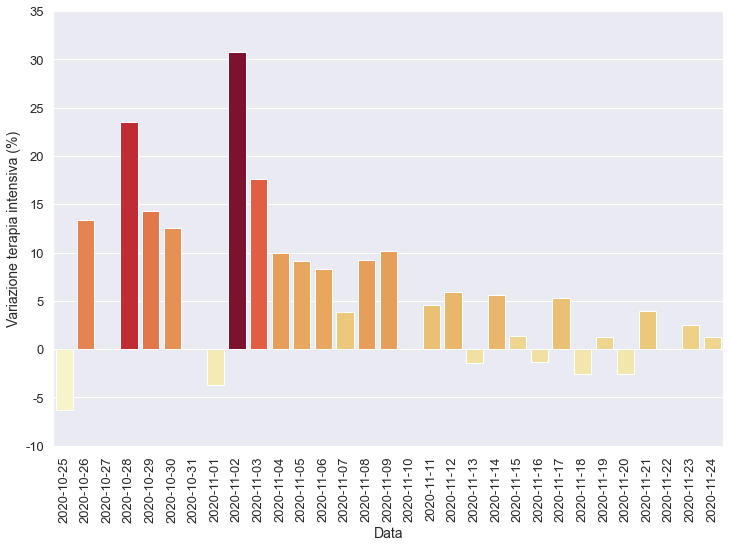

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

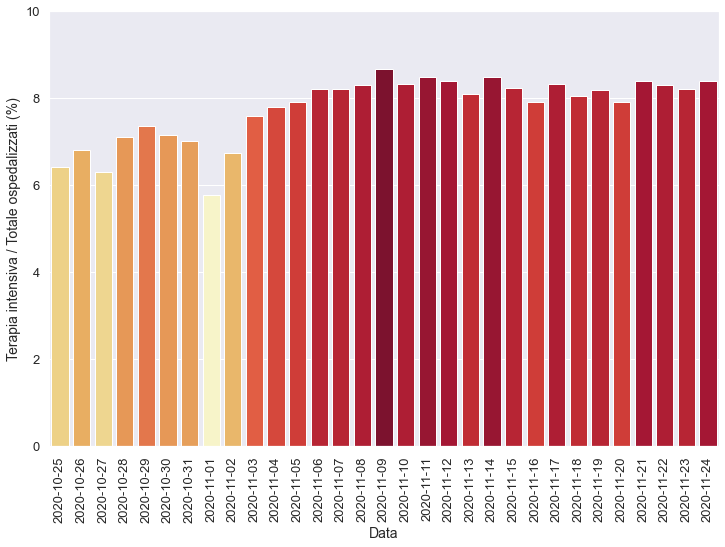

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

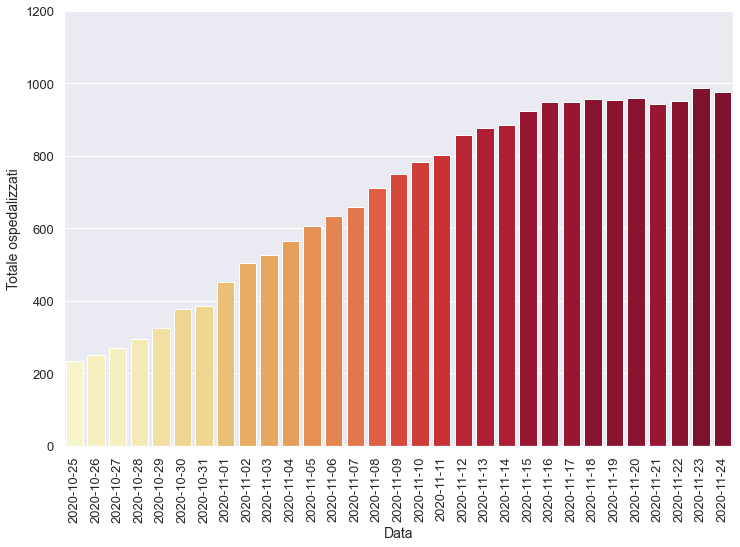

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

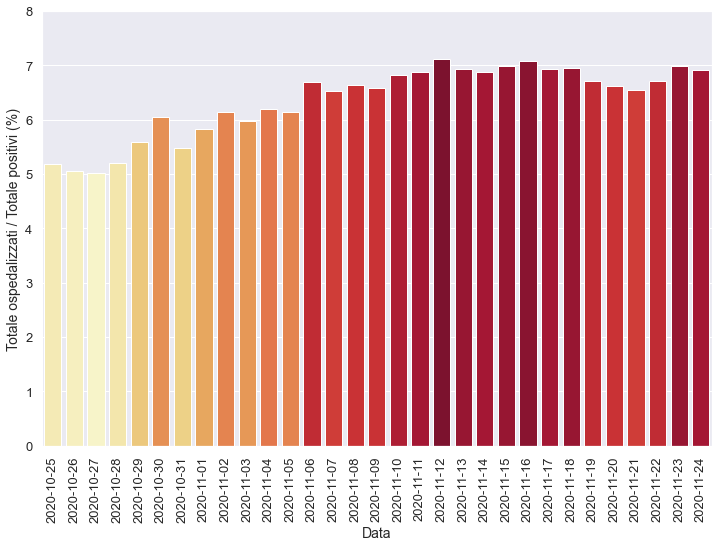

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

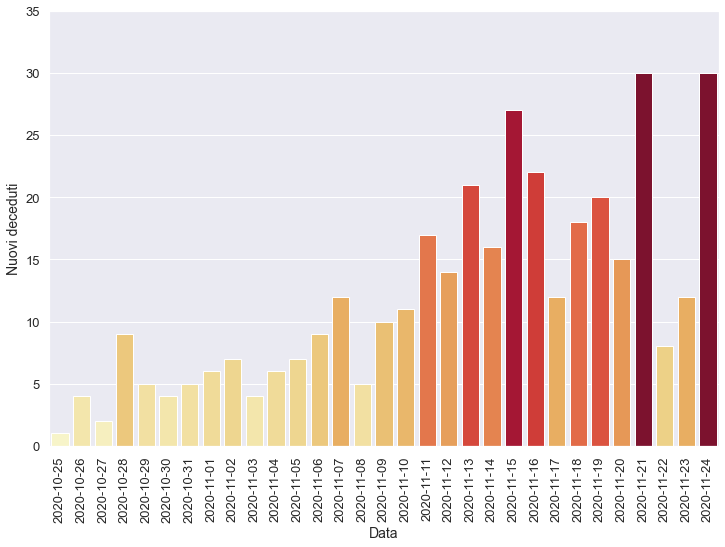

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

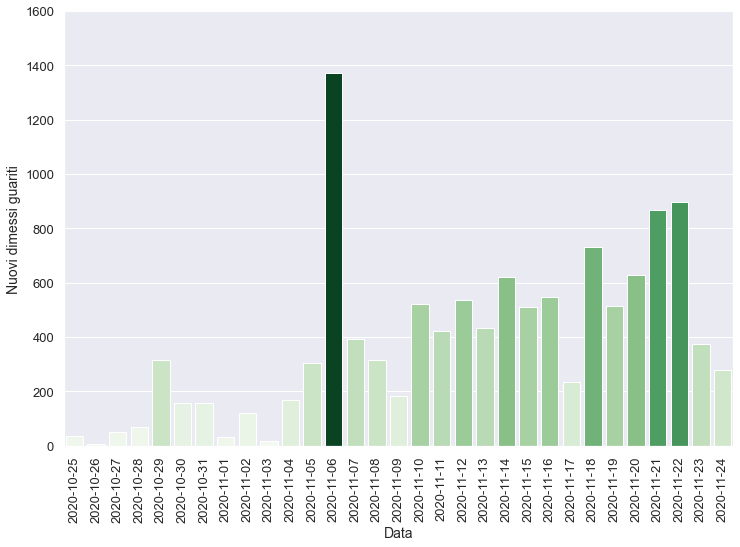

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-17T17:00:00,4,Trentino-Alto Adige,870,79,949,12746,13695,289,534,...,12.0,2958.0,1057.0,288.0,8.32,6.93,18.05,50.52,5.33,3.983
1,2020-11-18T17:00:00,4,Trentino-Alto Adige,879,77,956,12805,13761,66,817,...,18.0,7692.0,1965.0,59.0,8.05,6.95,10.62,41.58,-2.53,5.966
2,2020-11-19T17:00:00,4,Trentino-Alto Adige,876,78,954,13236,14190,429,962,...,20.0,6135.0,1790.0,431.0,8.18,6.72,15.68,53.74,1.30,6.991
3,2020-11-20T17:00:00,4,Trentino-Alto Adige,885,76,961,13554,14515,325,970,...,15.0,6330.0,1663.0,318.0,7.91,6.62,15.32,58.33,-2.56,6.836
4,2020-11-21T17:00:00,4,Trentino-Alto Adige,863,79,942,13435,14377,-138,760,...,30.0,7784.0,2663.0,-119.0,8.39,6.55,9.76,28.54,3.95,5.236
5,2020-11-22T17:00:00,4,Trentino-Alto Adige,873,79,952,13214,14166,-211,694,...,8.0,6424.0,1844.0,-221.0,8.30,6.72,10.80,37.64,0.00,4.827
6,2020-11-23T17:00:00,4,Trentino-Alto Adige,906,81,987,13146,14133,-33,353,...,12.0,2947.0,960.0,-68.0,8.21,6.98,11.98,36.77,2.53,2.492
7,2020-11-24T17:00:00,4,Trentino-Alto Adige,895,82,977,13151,14128,-5,303,...,30.0,3649.0,1169.0,5.0,8.39,6.92,8.30,25.92,1.23,2.144


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

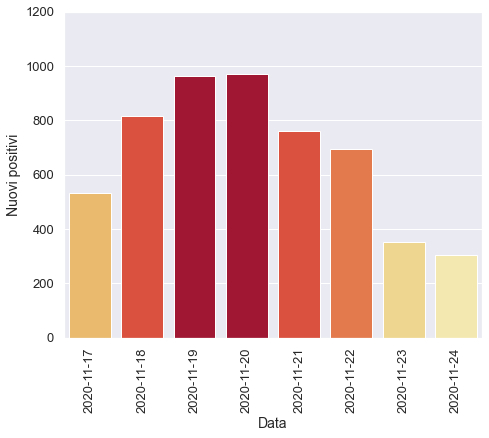

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

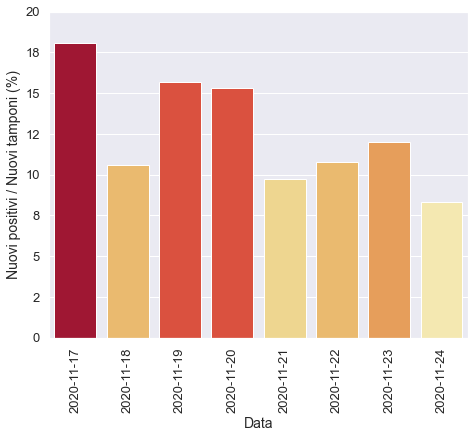

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

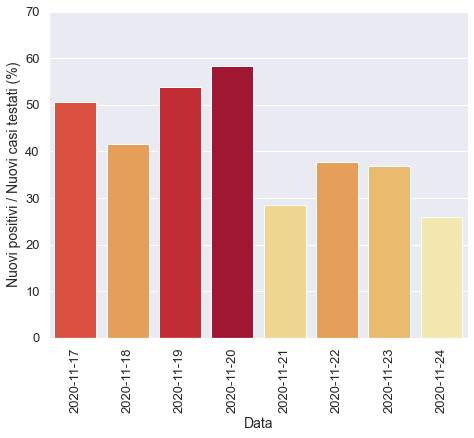

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

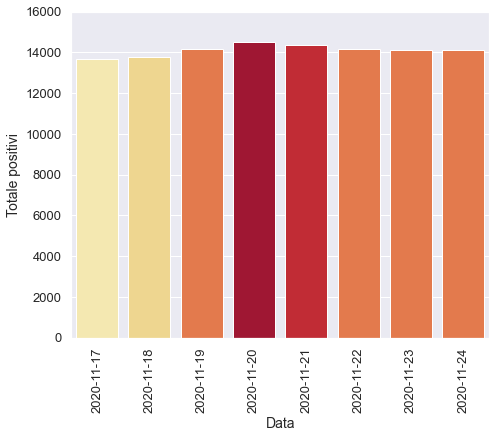

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

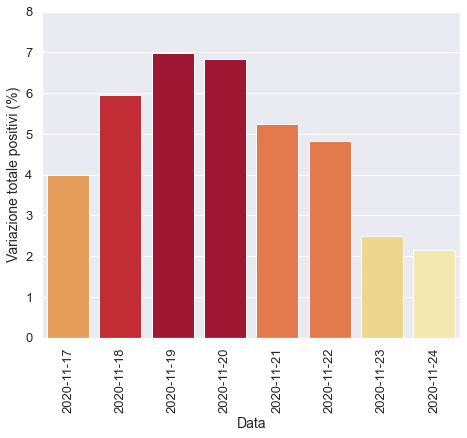

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

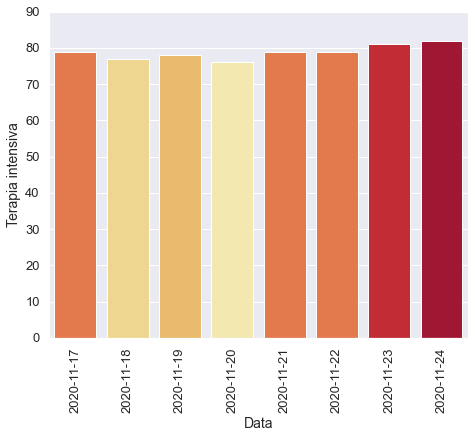

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

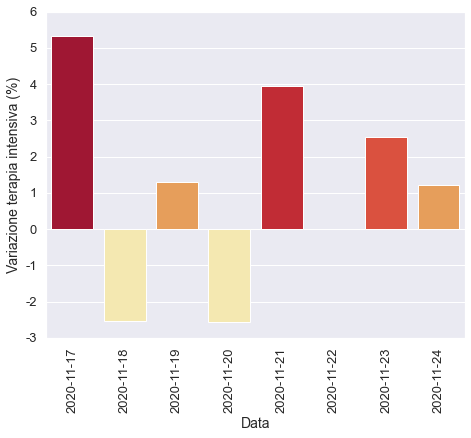

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

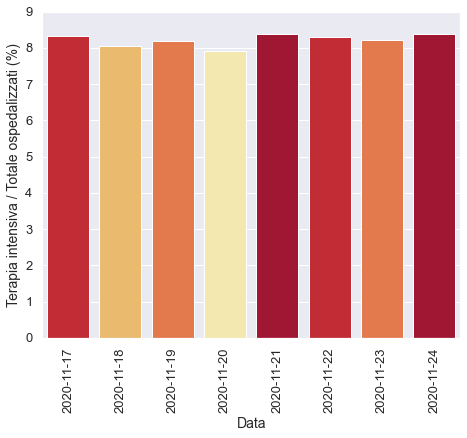

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

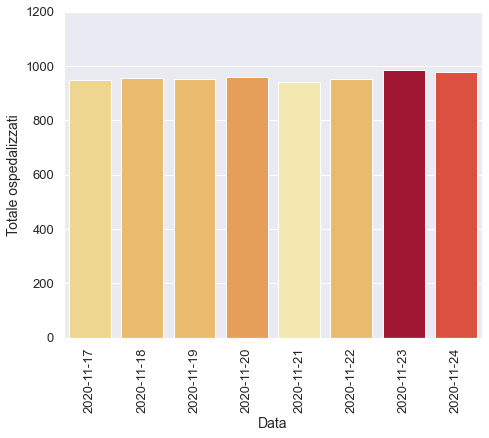

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

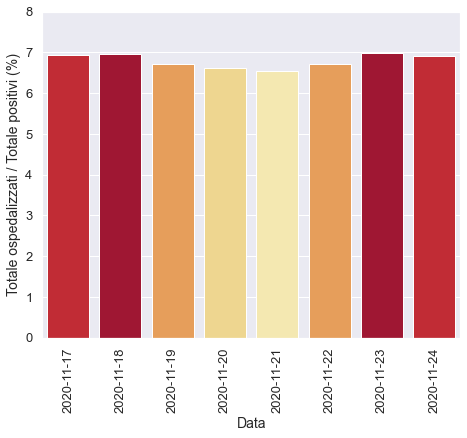

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

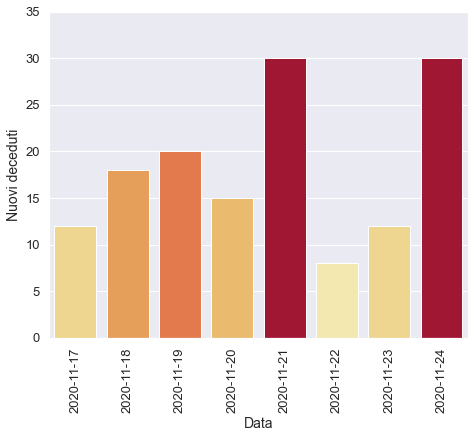

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

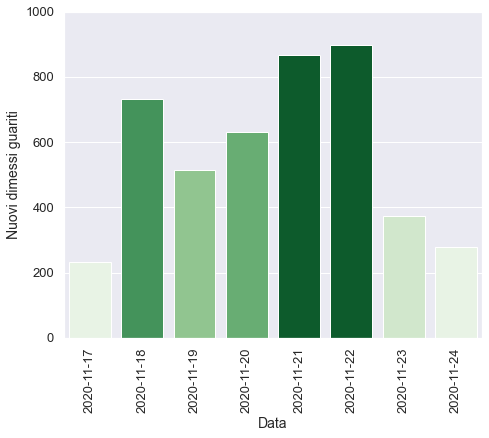

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)